# Titanic: Machine Learning from Disaster

This is my first take on the kaggle Titanic competition

## Setup

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "titanic_challenge"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Get the data from Kaggle

In [2]:
from zipfile import ZipFile

TITANIC_PATH = os.path.join("datasets", "titanic")

def fetch_titanic_data(titanic_path = TITANIC_PATH):
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    !kaggle competitions download -c titanic --force
    zipObj = ZipFile("titanic.zip")
    zipObj.extractall( path = titanic_path)
    os.remove("titanic.zip")
    print("Data successfully downloaded to:", titanic_path)

In [3]:
fetch_titanic_data()

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 397kB/s]
Data successfully downloaded to: datasets/titanic


In [4]:
def load_titanic_data(titanic_path = TITANIC_PATH):
    test_csv_path = os.path.join(titanic_path, 'test.csv')
    train_csv_path = os.path.join(titanic_path, 'train.csv')
    test = pd.read_csv(test_csv_path)
    train = pd.read_csv(train_csv_path)
    return test, train

In [5]:
test, train = load_titanic_data()

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##  Explore the data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
train.groupby("Parch")["Parch"].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

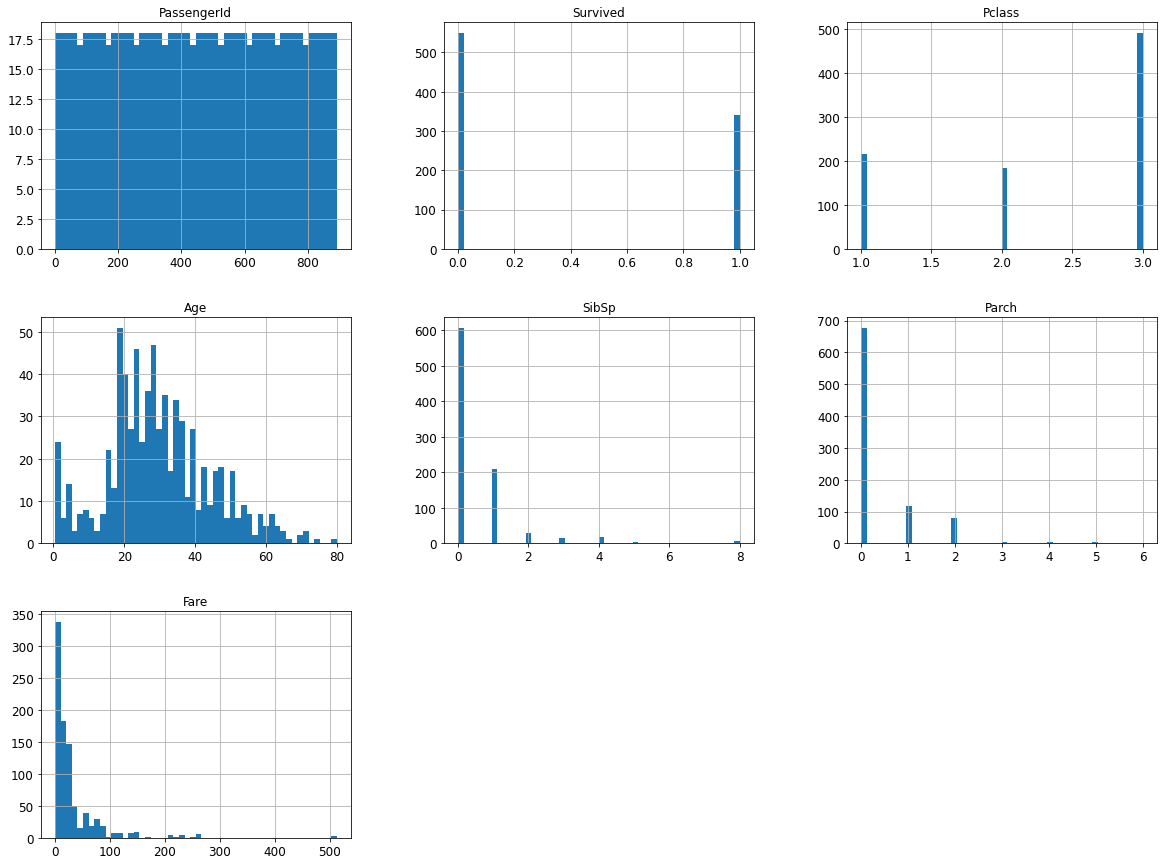

In [11]:
train.hist(bins = 50, figsize = (20, 15))

<AxesSubplot:>

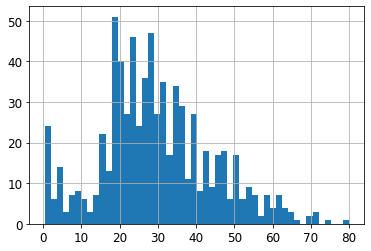

In [12]:
train["Age"].hist(bins = 50)

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<A

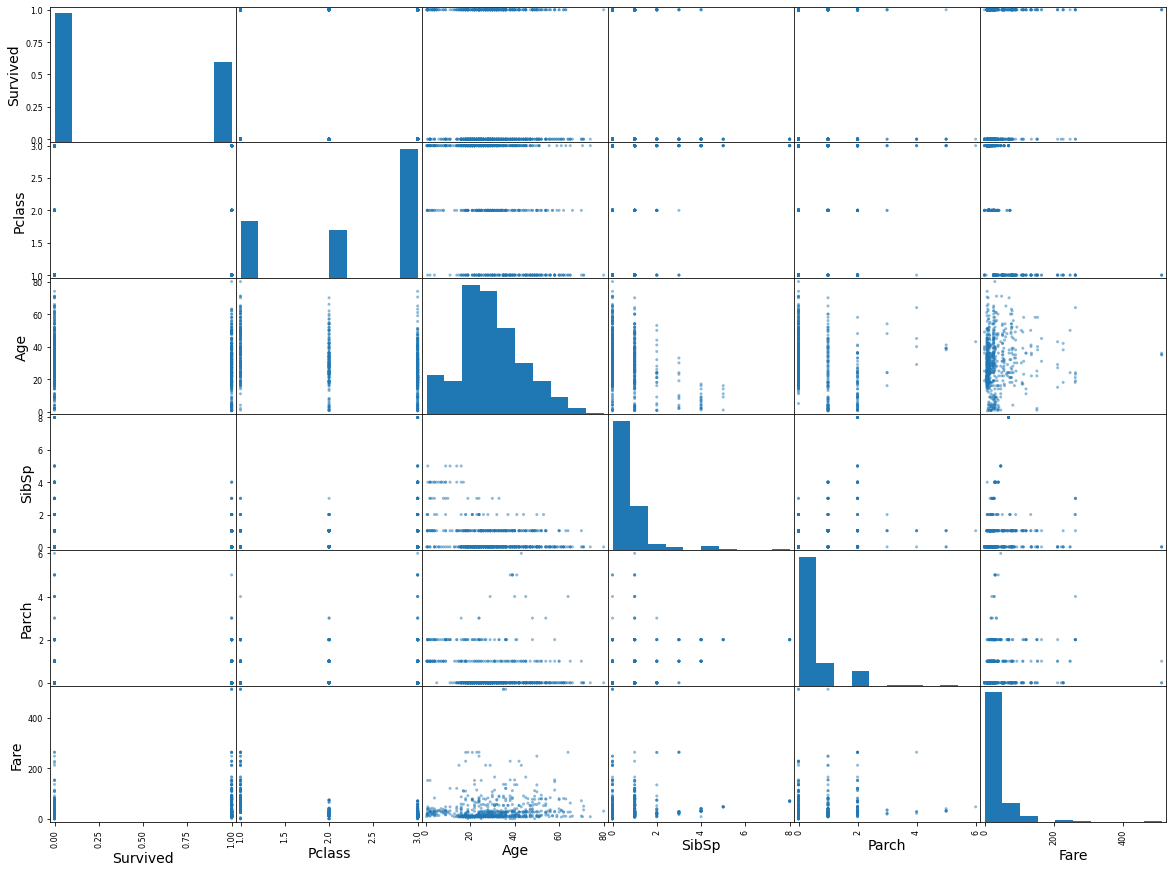

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
scatter_matrix(train[attributes], figsize = (20, 15))

In [14]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [15]:
train[["Fare", "Survived", "Pclass"]].groupby("Survived").mean()

,Fare,Pclass
Survived,,
0,22.117887,2.531876
1,48.395408,1.950292


<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

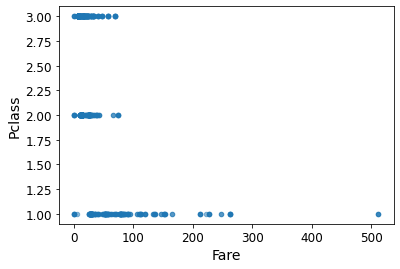

In [16]:
train.plot.scatter(x = "Fare", y = "Pclass", alpha = 0.5)

In [56]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McKane, Mr. Peter David",male,1601,G6,S
freq,1,577,7,4,644


### Visualization

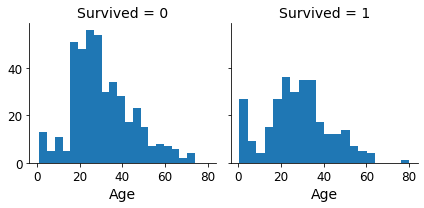

In [59]:
import seaborn as sns

g = sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

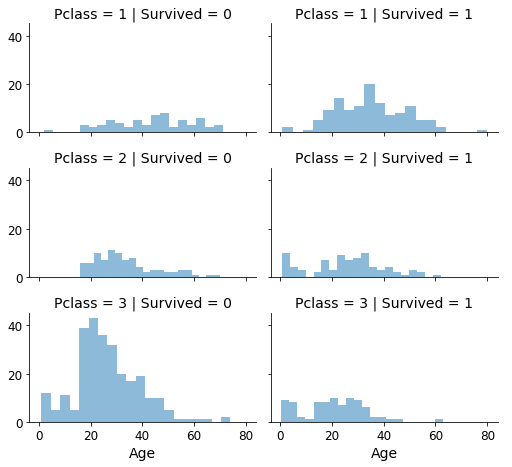

In [63]:
grid = sns.FacetGrid(train, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

/home/asalaheddin/miniconda3/envs/minimal_ds/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/asalaheddin/miniconda3/envs/minimal_ds/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


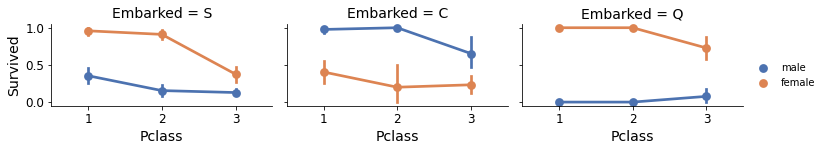

In [67]:
grid = sns.FacetGrid(train, col = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

/home/asalaheddin/miniconda3/envs/minimal_ds/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


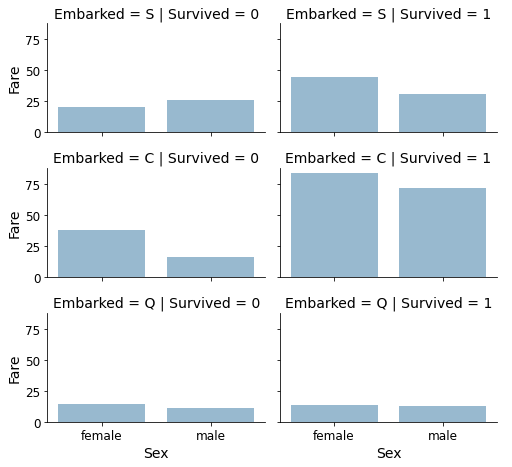

In [69]:
grid = sns.FacetGrid(train, row = 'Embarked', col = 'Survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, ci = None)
grid.add_legend()

## Prepare the data for ML algorithms

In [17]:
titanic = train.drop("Survived", axis = 1)
titanic_labels = train["Survived"].copy()


In [18]:
titanic.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_labels.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Fill the missing data

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [21]:
titanic["Cabin"].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
E101           3
              ..
D46            1
B38            1
A6             1
D30            1
C62 C64        1
Name: Cabin, Length: 147, dtype: int64

In [22]:
titanic[titanic["Embarked"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [23]:
titanic[titanic["Cabin"] == "B28"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [24]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Imputer

* Numerical
    * Pclass (mode)
    * Age (fill with median since there isn't a lot whole missing)
    * SibSp (median)
    * Parch (median)
    * Fare (mean)

* PassengerId

* Categorical: Recode the following
    * Sex
    * Embarked (replace with the mode 'S', since 644 passengers emarked there)
* Remove the following:
    * Name
    * Ticket
    * Cabin (This whole attribute probably should be dropped, only 204 have a cabin, another option is to try with binary true or false for know or unkown)


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

mode_features = ['Pclass']
median_features = ['Age', 'SibSp', 'Parch']
mean_features = ['Fare']

num_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked']

# Construct the full pipeline
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy = "most_frequent")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline= Pipeline([
    ('mode_imputer', SimpleImputer(strategy = "most_frequent")),
    ('encoding', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features),
    ('cat_pipeline', cat_pipeline, cat_features)
])

In [26]:
titanic_prepared = full_pipeline.fit_transform(titanic)

In [27]:
titanic_prepared.shape

(891, 10)

In [28]:
titanic_prepared

array([[ 0.82737724, -0.49779327,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.71504807,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.19458293, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.3461881 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.19458293, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.26023257, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

## Select and Train a Classifier

Use the graph at: https://scikit-learn.org/stable/_static/ml_map.png to go through the models: 

In [29]:
from sklearn.svm import LinearSVC
linearsvc_clf = LinearSVC(tol = 1e-5, max_iter = 100000)
linearsvc_clf.fit(titanic_prepared, titanic_labels)


LinearSVC(max_iter=100000, tol=1e-05)

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(linearsvc_clf, titanic_prepared, titanic_labels, cv = 3, scoring = "accuracy")

array([0.79124579, 0.78451178, 0.78114478])

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(titanic_prepared, titanic_labels)

KNeighborsClassifier()

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, titanic_prepared, titanic_labels, cv = 3, scoring = "accuracy")

array([0.78787879, 0.79461279, 0.80808081])

In [33]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(titanic_prepared, titanic_labels)

SVC(gamma='auto')

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, titanic_prepared, titanic_labels, cv = 5, scoring = "accuracy")

array([0.83240223, 0.83146067, 0.81460674, 0.81460674, 0.84831461])

In [35]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(n_estimators = 100)
adaboost_clf.fit(titanic_prepared, titanic_labels)

AdaBoostClassifier(n_estimators=100)

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(adaboost_clf, titanic_prepared, titanic_labels, cv = 3, scoring = "accuracy")

array([0.75757576, 0.81144781, 0.82828283])

In [37]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=100)
random_forest_clf.fit(titanic_prepared, titanic_labels)

RandomForestClassifier()

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(random_forest_clf, titanic_prepared, titanic_labels, cv = 3, scoring = "accuracy")

array([0.77777778, 0.83501684, 0.78787879])

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(n_estimators=100)
GB_clf.fit(titanic_prepared, titanic_labels)

GradientBoostingClassifier()

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(GB_clf, titanic_prepared, titanic_labels, cv = 3, scoring = "accuracy")

array([0.8047138 , 0.83501684, 0.81818182])

In [41]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('SVC', svm_clf), ('ada', adaboost_clf), ('GB', GB_clf)],
    voting = 'hard'
)
voting_clf.fit(titanic_prepared, titanic_labels)

VotingClassifier(estimators=[('SVC', SVC(gamma='auto')),
                             ('ada', AdaBoostClassifier(n_estimators=100)),
                             ('GB', GradientBoostingClassifier())])

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(voting_clf, titanic_prepared, titanic_labels, cv = 5, scoring = "accuracy")

array([0.83240223, 0.8258427 , 0.82022472, 0.80337079, 0.85955056])

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [1, 2, 3, 4, 5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4, 5, 6],
     'gamma': ['scale', 'auto']
}]

grid_search = GridSearchCV(svm_clf, param_grid, cv = 5, n_jobs = -1)

grid_search.fit(titanic_prepared, titanic_labels)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'), n_jobs=-1,
             param_grid=[{'C': [1, 2, 3, 4, 5], 'degree': [1, 2, 3, 4, 5, 6],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [44]:
grid_search.best_params_

{'C': 3, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [45]:
from sklearn.svm import SVC

svm_clf = SVC(C = 3, degree = 1, gamma="auto", kernel = 'rbf')
svm_clf.fit(titanic_prepared, titanic_labels)

SVC(C=3, degree=1, gamma='auto')

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, titanic_prepared, titanic_labels, cv = 5, scoring = "accuracy")

array([0.83798883, 0.82022472, 0.81460674, 0.81460674, 0.87078652])

## Final Predictions using the best model

In [70]:
final_model = grid_search.best_estimator_
test_prepared = full_pipeline.transform(test)
final_predictions = final_model.predict(test_prepared)

In [71]:
final_predictions


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Prep test prediction for final submision

In [72]:
final_pred_dic = {
    'PassengerId': test['PassengerId'],
    'Survived': final_predictions
}

final_answer = pd.DataFrame(final_pred_dic)
final_answer.to_csv(os.path.join(TITANIC_PATH, 'final_predictions.csv'), index = False)

In [73]:
final_answer

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Submit

In [74]:
!kaggle competitions submit -c titanic -f /home/asalaheddin/handson-ml2/datasets/titanic/final_predictions.csv -m "SVC"

100%|██████████████████████████████████████| 2.77k/2.77k [00:02<00:00, 1.18kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster